保证系统的默认字符集为utf8，防止对中文字符的不识别

010-82456679 IBM SPSS售前

In [1]:
#-*- coding: utf-8 -*- 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ipykernel import kernelapp as app

数据分析的核心理念

发现数据的变化 

发现业务的变化

针对变化做决策

In [3]:
# file=pd.read_excel(r"C:\Tang Sence_8.0\WebReport\WEB-INF\reportlets\201610log.xlsx",sheetname='Sheet1')
f1=pd.read_excel("C:\D\日志1.xlsx",sheetname='Sheet1')
f2=pd.read_excel(r"C:\D\日志2.xlsx",sheetname='Sheet1')

对数据进行基本的描述性统计，利用describe命令：


1.平均值

2.标准差

3.最大最小值

4.四分位数

#######################################################

基本分析法：

对比分析  发现数据的变化

分组分析  数据的分布特征

结构分析

趋势分析 数据按时间的变化

高级分析法：

交叉分析法

综合评价法  多指标分析和评价

杜邦分析法

漏斗分析法  业务流程优化

################################################

数据分析的步骤：


明确目的

数据收集

数据预处理

数据分析

数据呈现

创建报告

##################################################

相关性分析   针对都是数值类型的数据

相关性的判断：

如果r的取值范围为-1≤r≤1

r>0为正相关，r<0为负相关

|r|=0表示不存在线性相关

|r|=1表示完全线性相关

0<|r|<1表示存在不同程度线性相关性

|r|≤0.3为不存在线性相关性

0.3<|r|≤0.5为低度线性相关性

0.5<|r|≤0.8为显著线性相关性

|r|>0.8为高度线性相关

方差分析  针对离散和数值型数据

关注数据特征之间的显著性，看P值 P<0.05表明有显著关系

回归分析  针对都是数值型数据

Sig F<0.05  R方 衡量数据模型的拟合程度  看各因素之间的P值是否小于0.05


In [20]:
data=f1.append(f2,ignore_index=True)

对两个表进行合并，使用append功能进行操作data=f1.append(f2,ignore_index=True)

In [22]:
new_data=data[[u'正常工时',u'非正班工时']]

In [24]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [70]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.vq import vq,kmeans,whiten

In [74]:
new=np.array(new_data)

In [ ]:
disMat = sch.distance.pdist(new,"euclidean")

In [ ]:
Z=sch.linkage(disMat,method='average')

In [ ]:
P=sch.dendrogram(Z)
plt.savefig('plot_dendrogram.png'

In [ ]:
cluster= sch.fcluster(Z, t=1, 'inconsistent') 

print "Original cluster by hierarchy clustering:\n",cluster

In [56]:
new=np.array(new_data)
new

array([[ 0. ,  4. ],
       [ 2. ,  0. ],
       [ 6. ,  4.5],
       ..., 
       [ 8. ,  0. ],
       [ 8. ,  0. ],
       [ 8. ,  0. ]])

In [68]:
X, y = make_blobs(n_samples=1000, n_features=8, centers=[[-1,-1], [0,0], [1,1], [2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2], 
                           random_state =150)

plt.figure()
y_pred = KMeans(n_clusters=5, random_state=150).fit_predict(X)

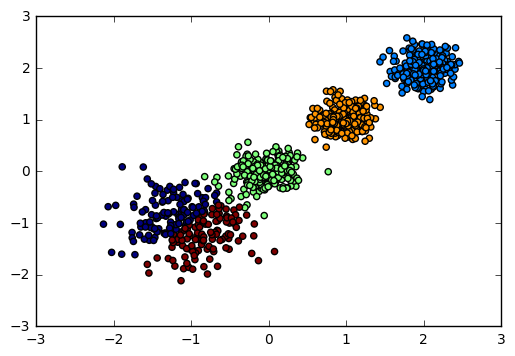

In [69]:

plt.scatter(X[:,0],X[:,1],c=y_pred) 
plt.show()

pd.to_datetime更改Excel文件中日期列类型为datetime类型，便于后续的索引设定

In [5]:
data[u'提报时间']=pd.to_datetime(data[u'提报时间'])

In [5]:
import random

In [19]:
center=np.random.randint(8, size=2)

对某一列进行多值筛选时可以用isin：data[data[u'项目类型'].isin([u'研发项目',u'国产化项目'])]这种形式处理

取isin的反向数据需要 ~data.isin()

In [23]:
Eng=data[data[u'项目类型'].isin([u'研发项目',u'国产化项目'])]

p=Eng[~Eng[u'创建人'].isin([u'Contractor-一信-Interior',u'Contractor-一信-Seat'])]


,日志名称,项目名称,二级任务,日志内容,部门,来源,创建人,创建日期,日志类型,提交进度,...,核实非正班,审核人,审核是否通过,审核时间,不通过原因,评价,员工类型,项目类型,SMTE,日志填写时长(秒)
0,项目管理,R020 Seat,Phase-3,R020PLM数据上传,护面开发室,项目计划,朱孟英,2016/6/30 19:17:31,项目工作,20.0,...,4.0,高伟,是,2016/7/1 11:04:00,NaN,6.0,薪水工,研发项目,否,25.0
1,塑料件及扶手,D090座椅-奔腾B90换代 Seat,Phase 1 -Proposal,数据检查及交流等,座椅开发室,项目计划,陆春林,2016/6/30 19:17:10,项目工作,90.0,...,0.0,徐晶坤,是,2016/7/1 8:06:32,NaN,8.0,薪水工,研发项目,否,13.0
2,A7M数据方案可行性分析及设计评审,A7M Seat,Phase 2 -Design＆amp；Development,方案及进度等分析讨论,座椅开发室,项目计划,陆春林,2016/6/30 19:16:12,项目工作,90.0,...,4.5,薛冰洋,是,2016/7/1 7:51:08,NaN,6.0,薪水工,研发项目,否,35.0
3,项目管理,Golf A7 纪念版 Seat,Phase4 -PV,月考勤汇总；CCNF造型座椅打孔裁片问题与大众及供应商交流,护面开发室,项目计划,熊洪丽,2016/6/30 19:16:03,项目工作,0.0,...,0.0,王子铖,是,2016/7/1 7:47:56,NaN,9.0,薪水工,国产化项目,否,85.0
4,迈腾B8L护面开发支持,Magoton B8L Seat,项目工作,工厂质量例会；国利裁片核对后返回国利协调；去工厂分析舒适灰后靠皱褶；样板更改点文件制作反馈大众,护面开发室,项目计划,熊洪丽,2016/6/30 19:14:26,项目工作,99.0,...,3.0,邱昭阳,是,2016/7/1 15:12:56,NaN,9.0,薪水工,国产化项目,否,230.0
5,项目问题处理,H7-FL Seat,Phase 1 -Proposal,整椅及数据更改,座椅开发室,项目计划,吴洪辉,2016/6/30 18:52:58,项目工作,90.0,...,2.0,吴洪辉,是,2016/6/30 18:53:58,NaN,6.0,薪水工,研发项目,否,7.0
6,A7M二排整椅开发,A7M Seat,Phase 2 -Design＆amp；Development,A7M二排骨架数据,座椅开发室,项目计划,孙得彧,2016/6/30 18:44:00,项目工作,50.0,...,2.5,薛冰洋,是,2016/7/1 7:51:08,NaN,6.0,薪水工,研发项目,否,18.0
7,H7-FL整椅设计,H7-FL Seat,NaN,文件整理,座椅开发室,项目计划,荣雅楠,2016/6/30 18:43:15,项目工作,100.0,...,0.0,吴洪辉,是,2016/6/30 18:53:59,NaN,6.0,薪水工,研发项目,否,176.0
8,H7-FL整椅设计,H7-FL Seat,NaN,PLM系统数据发放问题,座椅开发室,项目计划,荣雅楠,2016/6/30 18:40:15,项目工作,100.0,...,4.0,吴洪辉,是,2016/6/30 18:53:59,NaN,6.0,薪水工,研发项目,否,15.0
10,本体-2D,J7H DP,Phase-3,T099项目出图规则制定,内饰开发室,项目计划,孙闻彬,2016/7/4 16:15:36,项目工作,100.0,...,0.0,李红(Interior),是,2016/7/6 10:37:59,NaN,6.0,薪水工,研发项目,否,30.0


In [59]:
pro=pd.pivot_table(p, values=[u'正常工时',u'非正班工时'], index=[u'创建人',pd.Grouper(freq='W', key=u'提报时间')],
                       aggfunc=np.sum)

In [60]:
pro.describe()
a=pro.sort_values(by=u'非正班工时')

创建人           提报时间      
丁海风           2016-02-07     0.0
沙丽伟           2016-04-17     0.0
              2016-04-10     0.0
              2016-04-03     0.0
              2016-03-27     0.0
              2016-03-20     0.0
              2016-03-13     0.0
              2016-04-24     0.0
              2016-03-06     0.0
              2016-02-21     0.0
              2016-02-07     0.0
毛艳清           2016-10-16     0.0
              2016-10-09     0.0
              2016-10-02     0.0
              2016-09-25     0.0
沙丽伟           2016-02-28     0.0
              2016-05-01     0.0
              2016-05-08     0.0
              2016-08-14     0.0
              2016-11-27     0.0
              2016-11-20     0.0
              2016-11-13     0.0
              2016-11-06     0.0
              2016-10-30     0.0
              2016-10-23     0.0
              2016-10-16     0.0
              2016-10-09     0.0
              2016-10-02     0.0
              2016-09-25     0.0
              2016

In [81]:
b=a[u'正常工时']
for i in range(len(b)):
    if b[i]>40:
        b[i]=40.0

In [84]:
a

正常工时  非正班工时
创建人          提报时间                   
丁海风          2016-02-07  22.0    0.0
沙丽伟          2016-04-17  40.0    0.0
             2016-04-10  32.0    0.0
             2016-04-03  40.0    0.0
             2016-03-27  40.0    0.0
             2016-03-20  40.0    0.0
             2016-03-13  33.0    0.0
             2016-04-24  40.0    0.0
             2016-03-06  36.0    0.0
             2016-02-21  39.0    0.0
             2016-02-07  32.0    0.0
毛艳清          2016-10-16   8.0    0.0
             2016-10-09  16.0    0.0
             2016-10-02  36.0    0.0
             2016-09-25  16.0    0.0
沙丽伟          2016-02-28  32.0    0.0
             2016-05-01  40.0    0.0
             2016-05-08  32.0    0.0
             2016-08-14  37.0    0.0
             2016-11-27  40.0    0.0
             2016-11-20  40.0    0.0
             2016-11-13  40.0    0.0
             2016-11-06  32.0    0.0
             2016-10-30  40.0    0.0
             2016-10-23  29.0    0.0
             2016-10-16  40.0    0.0
             2016-10-09  16.0    0.0
             2016-10-02  37.0    0.0
             2016-09-25  40.0    0.0
             2016-09-18  32.0    0.0
...                       ...    ...
许彦秋          2016-04-10  32.0   26.0
贺斌           2016-11-06  40.0   26.0
胡昊           2016-11-06  40.0   26.0
程久成          2016-09-25  40.0   26.5
朱孟英          2016-04-03  39.0   27.0
霍明达          2016-03-20  40.0   27.0
韩国刚          2016-05-08  32.0   28.0
贺斌           2016-09-25  40.0   28.0
魏定           2016-05-08  32.0   28.0
杨帆(Interior) 2016-04-17  40.0   28.0
王维旭          2016-05-29  40.0   28.0
杨帆(Interior) 2016-05-29  40.0   28.0
             2016-09-04  40.0   28.0
张立禹          2016-06-12  32.0   28.5
朱孟英          2016-04-17  40.0   29.0
刘彦来          2016-02-28  40.0   30.0
张成烨          2016-11-06  39.0   30.0
刘仁龙          2016-09-11  36.0   30.0
王闯           2016-04-03  40.0   30.5
王维旭          2016-09-11  40.0   31.5
马彦宇          2016-10-09  16.0   32.0
杨帆(Interior) 2016-08-28  40.0   32.0
贺斌           2016-10-09  16.0   32.0
杨帆(Interior) 2016-05-15  40.0   32.0
李微           2016-02-07  40.0   32.0
李逾斯          2016-10-09  16.0   32.0
许彦秋          2016-04-17  40.0   32.5
张立禹          2016-10-16  40.0   33.5
丁海风          2016-08-14  40.0   34.0
杨常群          2016-08-21  39.0   34.5

[5959 rows x 2 columns]

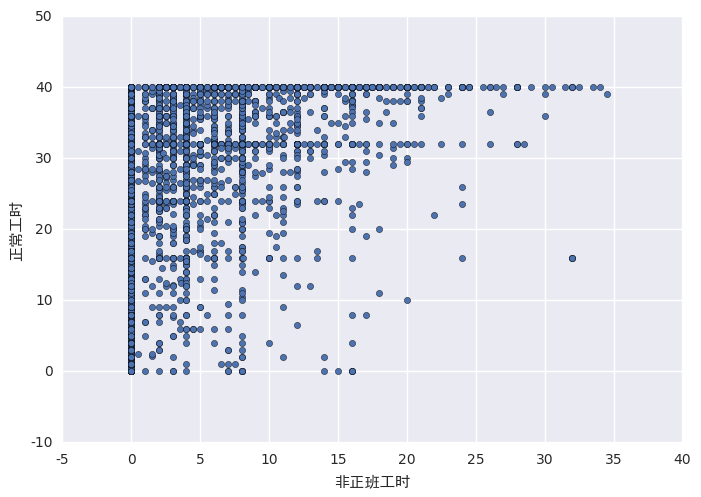

In [85]:
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure()
# sns.boxplot(data=(pro[u'非正班工时']>0))
a.plot.scatter(x=u'非正班工时',y=u'正常工时')
plt.show()

In [86]:
a[a[u'正常工时']>40]

,,正常工时,非正班工时
创建人,提报时间,,


In [87]:
a[a.index.isin(['2016-02-21'],level=1)]


,,正常工时,非正班工时
创建人,提报时间,,
沙丽伟,2016-02-21,39.0,0.0
毛艳清,2016-02-21,22.5,0.0
温雅棋,2016-02-21,22.5,0.0
狄剑超,2016-02-21,40.0,0.0
王亚楠,2016-02-21,8.0,0.0
熊洪丽,2016-02-21,22.0,0.0
杨玲玲,2016-02-21,28.0,0.0
杨姣,2016-02-21,40.0,0.0
杨常群,2016-02-21,28.0,0.0


In [63]:
list=['2016-02','2016-03','2016-04','2016-05','2016-06','2016-08','2016-09','2016-10','2016-11']
lst1=[]
lst2=[]
lst3=[]
pro_list=Eng[u'项目名称'].unique()
for i in pro_list:
    p=Eng[Eng[u'项目名称'].isin([i])]
    a=p.set_index(u'提报时间')
    pro=pd.pivot_table(p, values=[u'正常工时',u'非正班工时'], index=[pd.Grouper(freq='M', key=u'提报时间')],
                       aggfunc=np.sum)
    pro[u'项目名称']=i
   
    for l in list:
        b=a[l]
        c=len(b[u'创建人'].unique())
        if c>0:
            print(c)
            

#     pro[u'成员数量']=lst1
#     print(lst1)
#     print(pro)

27
39
36
32
19
9
1
22
30
22
20
23
31
29
47
27
29
29
31
34
35
38
39
54
32
4
3
6
6
6
6
6
6
3
8
11
7
9
9
8
9
6
15
14
15
14
14
12
11
23
7
3
1
2
3
3
3
4
4
1
2
2
5
3
1
2
1
1
30
29
25
26
28
25
26
32
29
4
13
19
19
15
14
13
11
9
11
13
12
12
11
6
3
5
14
13
14
14
13
16
20
24
21
12
6
8
9
10
8
7
5
9
7
6
3
6
6
4
5
3
5
8
15
15
14
13
15
17
19
12
3
1
1
3
3
3
5
8
9
8
9
6
4
2
6
6
5
5
6
4
1
5
5
4
4
3
2
1
3
3
3
1
1
16
13
11
16
14
15
18
24
19
20
23
23
21
26
19
18
30
16
18
25
22
23
17
15
16
18
17
5
4
5
3
4
1
4
4
6
4
8
2
5
1
17
6
2
2
2
3
4
2
2
4
4
2
1
6
4
6
5
4
9
2
4
5
2
3
4
3
5
2
4
6
4
3
4
4
15
23
17
13
15
14
20
20
17
9
8
9
17
10
7
7
16
3
3
1
1
1
1
1
4
5
5
2
4
4
3
3
4
6
5
5
3
4
4
3
4
4
2
2
2
3
2
1
3
4
2
3
5
4
4
6
7
2
3
2
3
3
2
3
2
1
7
12
10
8
8
6
4
11
4
5
4
2
2
4
5
3
2
2
4
1
3
3
2
1
1
1
2
3
4
3
2
3
2
2
6
3
5
2
2
6
6
6
3
11
11
6
5
7
6
10
19
12
10
11
5
2
6
5
4
15
10
7
11
9
10
7
12
17
15
18
8
9
8
6
10
3
3
2
2
1
1
2
1
1
1
1
2
1
1
1
1
1
2
1
2
1
2
3
6
5
2
5
4
6
4
1
4
7
11
9
2
3
3
2
1
2
2
3
2
4
4
2
1
1
1
1
1
1
3
3


KeyError: '2016-02'

In [48]:
pro=pd.pivot_table(p, values=[u'正常工时',u'非正班工时'], index=pd.Grouper(freq='M', key=u'提报时间'),
                aggfunc=np.sum)
# person=len(p[u'创建人'].unique())
pro

,正常工时,非正班工时
提报时间,,
2016-02-29,156.00,7.0
2016-03-31,164.50,16.0
2016-04-30,51.60,0.0
2016-05-31,53.00,0.0
2016-06-30,58.50,3.0
2016-08-31,117.00,0.0
2016-09-30,55.50,0.0
2016-10-31,84.11,8.0
2016-11-30,18.00,0.0


In [55]:
pro[u'项目名称'],pro[u'项目类型']=(u'136B SEAT',u'研发项目')
pro

,正常工时,非正班工时,项目名称,项目类型
提报时间,,,,
2016-02-29,156.00,7.0,136B SEAT,研发项目
2016-03-31,164.50,16.0,136B SEAT,研发项目
2016-04-30,51.60,0.0,136B SEAT,研发项目
2016-05-31,53.00,0.0,136B SEAT,研发项目
2016-06-30,58.50,3.0,136B SEAT,研发项目
2016-08-31,117.00,0.0,136B SEAT,研发项目
2016-09-30,55.50,0.0,136B SEAT,研发项目
2016-10-31,84.11,8.0,136B SEAT,研发项目
2016-11-30,18.00,0.0,136B SEAT,研发项目


In [93]:
p1=p.set_index(u'提报时间')
list=['2016-02','2016-03','2016-04','2016-05','2016-06','2016-08','2016-09','2016-10','2016-11']
lst1=[]
lst2=[]
lst3=[]
for i in list:
    lst=p1[i]
    person=len(lst[u'创建人'].unique())
    task=len(lst[u'日志名称'].unique())
    phase=lst[u'二级任务'].unique()
    lst1.append(person)
    lst2.append(task)
    lst3.append(phase)
    

In [94]:
lst3

[array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object),
 array(['Phase4 -PV'], dtype=object)]

In [95]:
pro[u'项目人员数量'],pro[u'任务数量'],pro[u'项目阶段']=[lst1,lst2,lst3]

In [96]:
a=pro.reset_index()

In [97]:
pro2=pro.copy()
b=pro2.reset_index()
c=pd.concat([a, b], ignore_index=False)
c.set_index(u'提报时间')


,正常工时,非正班工时,项目名称,项目类型,项目人员数量,任务数量,项目阶段
提报时间,,,,,,,
2016-02-29,156.00,7.0,136B SEAT,研发项目,6,7,[Phase4 -PV]
2016-03-31,164.50,16.0,136B SEAT,研发项目,3,4,[Phase4 -PV]
2016-04-30,51.60,0.0,136B SEAT,研发项目,5,6,[Phase4 -PV]
2016-05-31,53.00,0.0,136B SEAT,研发项目,2,3,[Phase4 -PV]
2016-06-30,58.50,3.0,136B SEAT,研发项目,2,2,[Phase4 -PV]
2016-08-31,117.00,0.0,136B SEAT,研发项目,6,4,[Phase4 -PV]
2016-09-30,55.50,0.0,136B SEAT,研发项目,6,4,[Phase4 -PV]
2016-10-31,84.11,8.0,136B SEAT,研发项目,6,5,[Phase4 -PV]
2016-11-30,18.00,0.0,136B SEAT,研发项目,3,2,[Phase4 -PV]


In [42]:
list=pd.DataFrame(person,index=dates,columns=[u'人员数量'])
list

,人员数量
2016-02-29,13
2016-03-31,13
2016-04-30,13
2016-05-31,13
2016-06-30,13
2016-07-31,13
2016-08-31,13
2016-09-30,13
2016-10-31,13
2016-11-30,13


In [33]:
list[u'人员数量']=person
print(list)

Empty DataFrame
Columns: [月份, 项目类型, 人员数量, 任务数量, 正常工时, 加班工时]
Index: []


利用pd.pivot_table功能可以创建数据透视表，进行多种数据汇总功能

In [83]:
pro=pd.pivot_table(project, values=[u'正常工时'], index=pd.Grouper(freq='M', key=u'提报时间'),
                columns=u'项目名称', aggfunc=np.sum)

In [84]:
pro.T

提报时间                                                    2016-02-29  \
     项目名称                                                            
正常工时 136B SEAT                                              156.00   
     330B SEAT                                                 NaN   
     A SUV                                                     NaN   
     A0-EV  Seat                                             54.20   
     A0EV FC                                                  4.00   
     A2 FC                                                   47.50   
     A2 IP                                                  124.00   
     A2-EV SEAT                                              16.00   
     A30 Seat                                              1095.10   
     A30-II Seat                                            354.10   
     A7M Seat                                              1124.60   
     AU373/AU371 DP 2017年型                                     NaN   
     Audi B9 IP                                             116.00   
     Audi Q5 NF                                                NaN   
     Audi Q5 NF IP                                           70.50   
     Audi X55 IP                                               NaN   
     Audi X88 PA Seat                                          NaN   
     A级车出租车型仪表板项目 IP                                           NaN   
     B70 FL FC                                                 NaN   
     B70 FL IP                                                 NaN   
     B7L小桌板通风座椅                                                NaN   
     Besturn A class Seat                                    24.65   
     Bora Derivat DP                                          9.00   
     Bora Derivat IP                                           NaN   
     Bora NF Derivate Seat                                  268.00   
     C53F FC                                                   NaN   
     C53F IP                                                   NaN   
     CCFB  SEAT                                                NaN   
     Class A2 SEAT                                          253.75   
     D015 IP                                                256.00   
...                                                            ...   
     NG-17 DP                                                  NaN   
     NG-17 IP                                                  NaN   
     NG-17 OHC                                                 NaN   
     New Bora NF DP                                          91.00   
     New Bora NF IP                                          11.50   
     New Bora NF Seat                                       188.60   
     New Bora NF Seat Sportpaket                               NaN   
     New BoraNF Seat 2million                                  NaN   
     New Outland seat                                      2023.75   
     R020 SEAT改型                                               NaN   
     R020 Seat                                              629.15   
     Recaro国产化 SEAT                                           5.00   
     T99 PA Seat                                               NaN   
     Tiger Power Track                                       30.50   
     Tiger Track                                             29.00   
     Truck Seat Platform                                    506.90   
     V501 Seat                                                0.10   
     VW253CN Seat                                              NaN   
     VW276 DP                                                  NaN   
     VW276 Seat                                                NaN   
     VW326/3CN DP                                              NaN   
     X77 PA运动型国产化项目 SEAT                                     21.00   
     X77 Seat                                                  NaN   
     X77PA SEAT                                              49.50   
     X80F 

In [66]:
pro[u'项目数量']=pro.T.count()

In [67]:
pro

正常工时                                                    \
项目名称       136B SEAT 330B SEAT  A SUV A0-EV  Seat A0EV FC A2 FC  A2 IP   
提报时间                                                                     
2016-02-29    156.00       NaN    NaN       54.20     4.0  47.5  124.0   
2016-03-31    164.50       NaN    NaN       91.00    13.5  94.5   54.0   
2016-04-30     51.60       NaN    NaN       96.75     8.0  16.5   10.5   
2016-05-31     53.00       NaN    NaN       61.00    11.5  45.0   42.0   
2016-06-30     58.50       NaN    NaN      148.75     4.0  34.5   28.6   
2016-08-31    117.00     67.00  221.5       45.00     NaN  46.0   37.5   
2016-09-30     55.50    398.00  380.5       22.00     NaN  39.6   28.6   
2016-10-31     84.11   1209.92  441.7       11.10     1.0   4.0   17.5   
2016-11-30     18.00   3055.00  795.0         NaN     NaN   7.5    3.5   

                                           ...                                \
项目名称       A2-EV SEAT A30 Seat A30-II Seat ...  X77 PA运动型国产化项目 SEAT X77 Seat   
提报时间                                       ...                                 
2016-02-29      16.00  1095.10       354.1 ...                 21.0      NaN   
2016-03-31       2.00  1427.00       439.0 ...                  8.0      NaN   
2016-04-30     117.50  1124.30       185.0 ...                 11.0      NaN   
2016-05-31      40.50  1348.25       151.5 ...                 34.0      NaN   
2016-06-30      85.50  1361.00       161.0 ...                 93.5      NaN   
2016-08-31      65.65  1110.00       144.0 ...                109.9      NaN   
2016-09-30      22.00  1204.50       150.0 ...                 22.5      NaN   
2016-10-31      81.05   969.70       182.9 ...                 19.5      0.5   
2016-11-30      19.50  1208.00       157.5 ...                 36.5      NaN   

                                                 \
项目名称       X77PA SEAT X80F FC X80F IP X80F seat   
提报时间                                              
2016-02-29      49.50   135.0    28.5    671.80   
2016-03-31     109.50   309.0    73.5    941.50   
2016-04-30     133.25   197.1    62.6    651.60   
2016-05-31      30.50    85.5    76.5    750.85   
2016-06-30       8.50   107.0    59.0    821.80   
2016-08-31        NaN    13.0     9.0    644.80   
2016-09-30        NaN     8.0     0.1    642.30   
2016-10-31       5.05     NaN     NaN    327.20   
2016-11-30        NaN     NaN     NaN    539.50   

                                                                          \
项目名称       后排靠背骨架轻量化 Rear Seat Frame Lightweight HR Forecast 宏华座椅项目 seat   
提报时间                                                                       
2016-02-29                                               NaN         NaN   
2016-03-31                                               NaN         NaN   
2016-04-30                                               NaN         NaN   
2016-05-31                                               NaN         NaN   
2016-06-30                                               NaN         NaN   
2016-08-31                                               NaN         NaN   
2016-09-30                                               NaN         NaN   
2016-10-31                                               0.5         0.1   
2016-11-30                                               NaN         0.5   

                      项目数量  
项目名称       红旗HS7 SEAT       
提报时间                        
2016-02-29      77.00   73  
2016-03-31     163.50   76  
2016-04-30      99.00   80  
2016-05-31     122.70   83  
2016-06-30     114.50   80  
2016-08-31     119.50   88  
2016-09-30      85.50   87  
2016-10-31     112.33   89  
2016-11-30     216.10   71  

[9 rows x 115 columns]

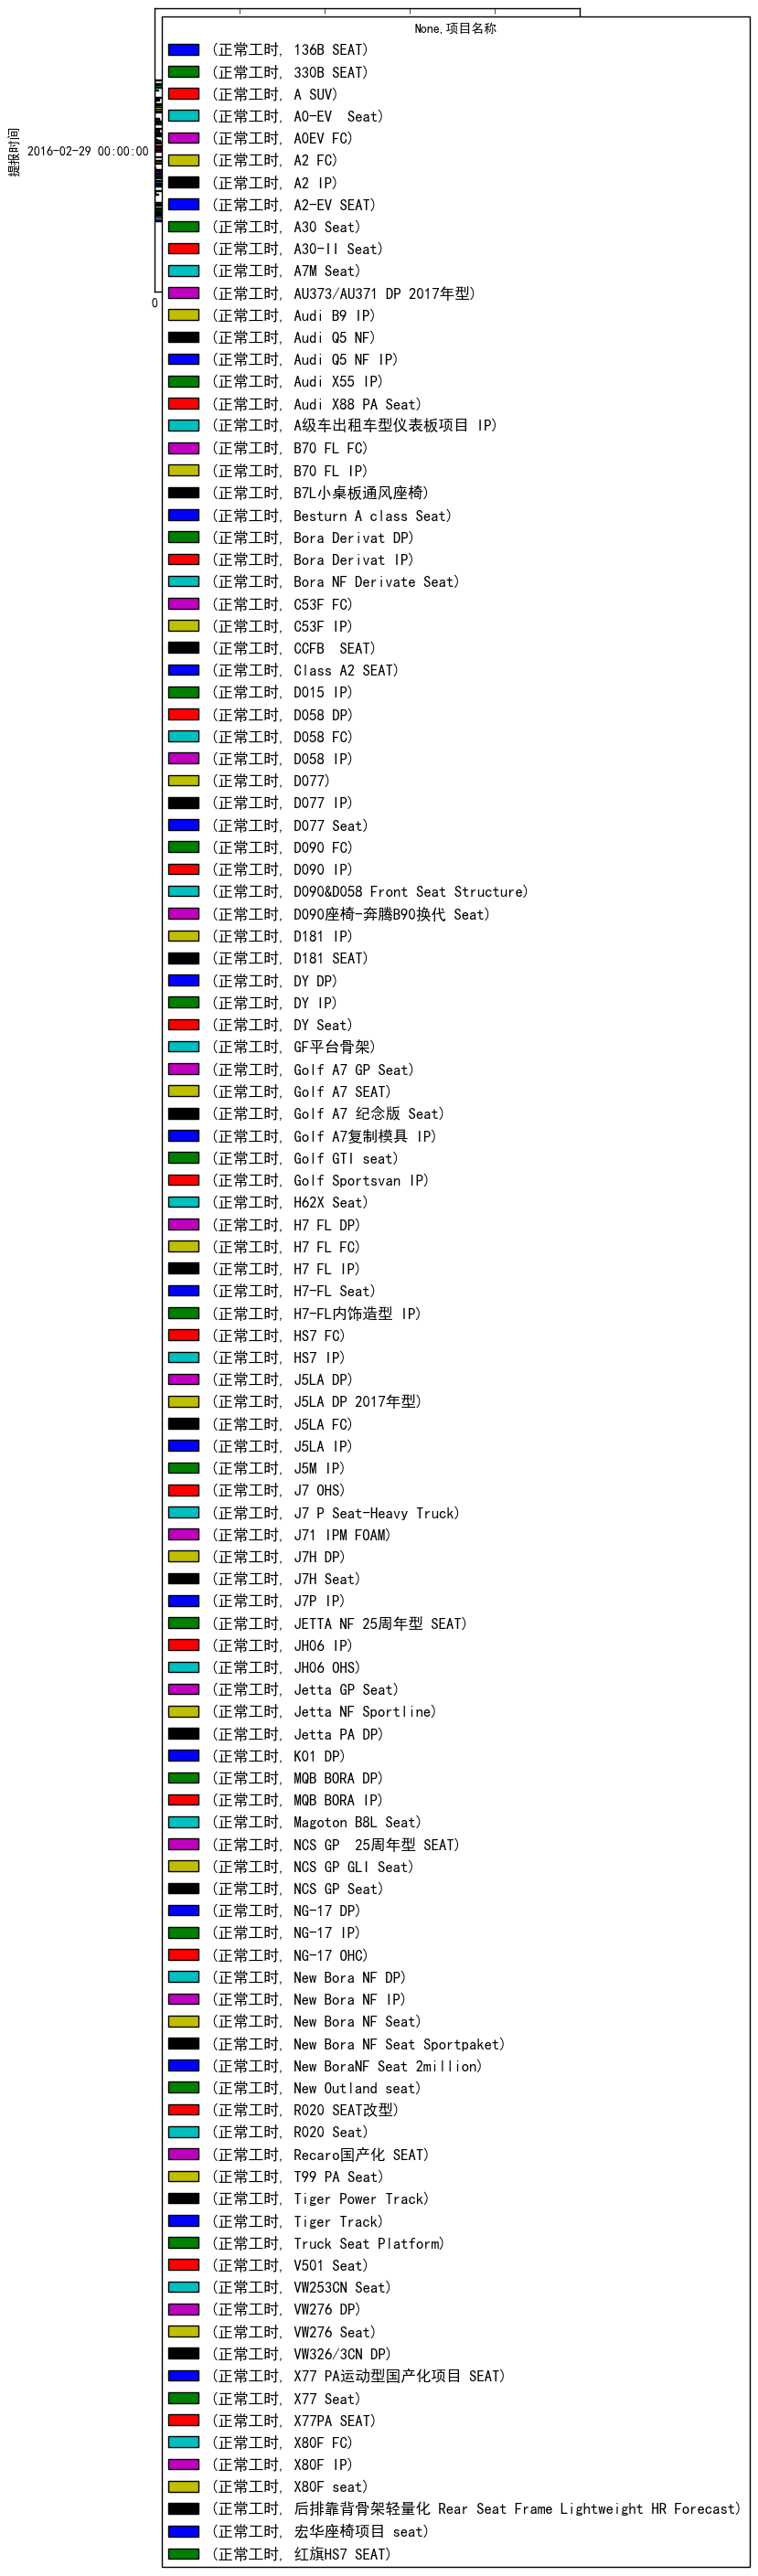

In [61]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
pro['2016-02'].plot(kind='barh')
plt.show()

    

    

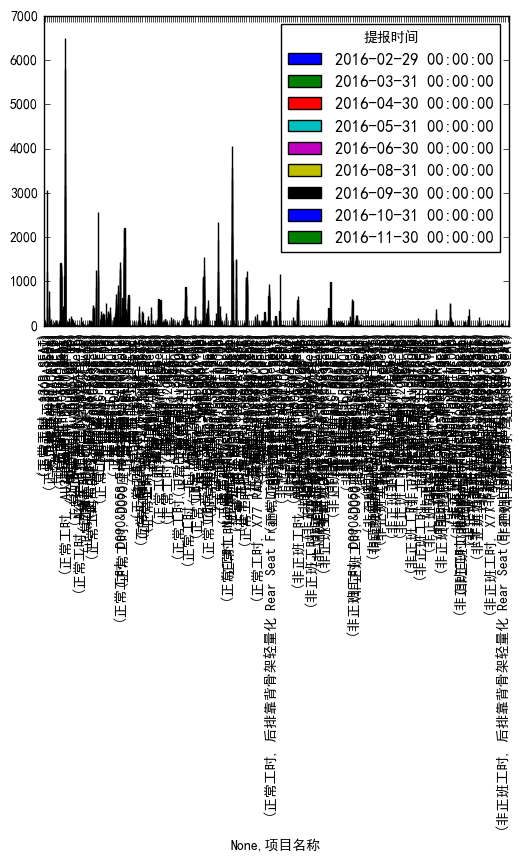

In [12]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure()
d=pro.T

d.plot(kind='bar')
plt.show()

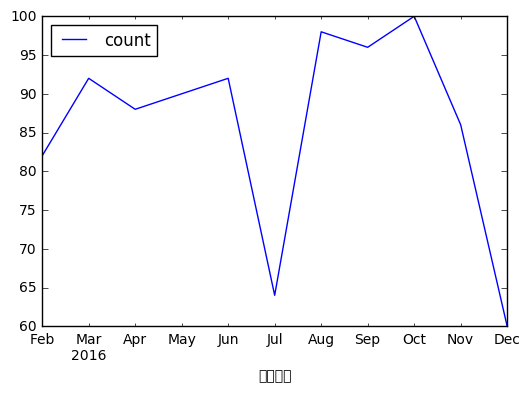

In [50]:
c=b[0:1]
c.T.plot()
plt.show()

In [61]:
b.to_excel("C:\D\project1.xlsx")

利用set_index设定索引列

In [14]:
data1=data.set_index(u'创建日期')

In [15]:
data2=data1[data1[u'项目类型']!=u'部门管理项目']

利用resample('D''W'Y'M'Q').sum()可以统计月日年周季度的数据汇总信息

In [16]:
ff=data2.groupby([u'项目名称']).resample('M').sum()

In [21]:
res=ff[u'正常工时']
res.head(5)

项目名称       创建日期      
136B SEAT  2016-02-29    156.0
           2016-03-31    163.5
           2016-04-30     33.1
           2016-05-31     72.5
           2016-06-30     34.5
Name: 正常工时, dtype: float64

In [34]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure()
res.index()

#     i.plot()
plt.show()

TypeError: 'MultiIndex' object is not callable

筛选数据中包含关键字的数据列表

file[(file[u'日志内容']).str.contains('PLM')]

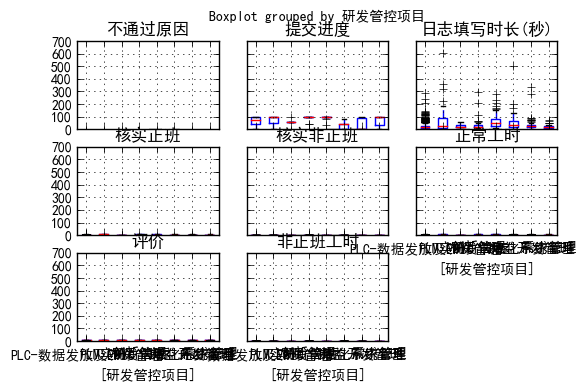

In [95]:
plt.figure()
file.boxplot(by=u'研发管控项目')
plt.show()

利用columns查看数据中列名称

In [4]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure()

以上设置保证画图后可正常显示中文

创建DataFrame的方法，用zip将两个list合并到一起

利用DataFrame赋予zip合并的两个list的列名

In [59]:
a=file.groupby([u'研发管控项目']).agg(np.sum)
print(a.columns)
data1=a[[u'正常工时',u'非正班工时']].copy()
data1



Index(['提交进度', '正常工时', '非正班工时', '核实正班', '核实非正班', '不通过原因', '评价', '日志填写时长(秒)'], dtype='object')


,正常工时,非正班工时
研发管控项目,,
PLC-数据发放及EPIC管理,963.11,38.5
PLM实施,229.50,10.5
VAVE,78.50,0.0
创新管理,327.50,22.5
对标,189.00,0.0
研发信息化系统管理,251.50,20.0
精益开发管理,254.00,10.0
需求管理,69.17,3.5


获取数据表中多个数据列使用file[['a','b','c']]来实现

使用散点图矩阵需要导入from pandas.tools.plotting import scatter_matrix模块后进行实现

scatter_matrix(data1, alpha=0.2, figsize=(6, 6), diagonal='kde')

散点图矩阵识别多个特征之间的相关性

相关性的判断：

如果r的取值范围为-1≤r≤1

r>0为正相关，r<0为负相关

|r|=0表示不存在线性相关

|r|=1表示完全线性相关

0<|r|<1表示存在不同程度线性相关性

|r|≤0.3为不存在线性相关性

0.3<|r|≤0.5为低度线性相关性

0.5<|r|≤0.8为显著线性相关性

|r|>0.8为高度线性相关

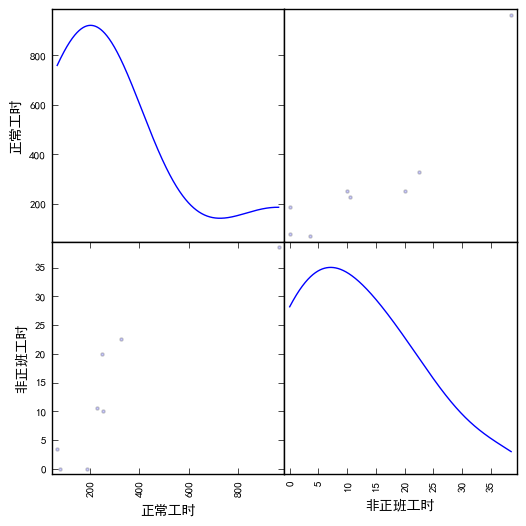

In [72]:
from pandas.tools.plotting import scatter_matrix
if __name__ == '__main__':
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.figure()
#     file.plot(kind='scatter',x=u'正常工时',y=u'提交进度')
    scatter_matrix(data1, alpha=0.2, figsize=(6, 6), diagonal='kde')
plt.show()

In [8]:
# t=data.sort_values(by=u'正常工时')

# plt.hist(t[u'正常工时'],16) #直方图确定数据和分组数
# plt.show()

创建日期
2016/10/24 21:46:17    8.0
2016/10/31 17:45:51    0.0
2016/10/31 17:35:45    1.0
2016/10/31 17:35:25    1.0
2016/10/31 17:34:59    0.0
2016/10/31 17:34:37    1.5
2016/10/31 17:34:10    0.0
2016/10/31 17:33:17    1.0
2016/10/31 17:32:51    1.0
2016/10/31 17:32:39    1.5
2016/10/31 17:32:08    1.0
2016/10/26 14:10:12    8.0
2016/10/31 16:00:58    2.0
2016/10/31 15:58:47    3.0
2016/10/31 15:58:15    1.0
2016/10/31 15:57:26    1.0
2016/10/31 15:57:08    3.0
2016/10/31 15:51:30    3.0
2016/10/31 15:50:42    2.0
2016/10/31 15:49:26    4.0
2016/10/31 15:48:22    2.0
2016/10/31 15:47:46    2.0
2016/10/31 15:47:54    2.0
2016/10/31 15:46:06    0.1
2016/10/31 15:45:21    0.1
2016/10/31 15:45:06    0.1
2016/10/31 15:44:19    0.7
2016/10/31 15:33:23    4.0
2016/10/31 15:32:17    4.0
2016/10/31 15:28:44    2.0
                      ... 
2016/10/10 12:36:46    8.0
2016/10/10 12:35:53    8.0
2016/10/12 11:16:01    4.0
2016/10/12 11:14:36    4.0
2016/10/8 10:23:25     1.0
2016/10/13 8:37:00     

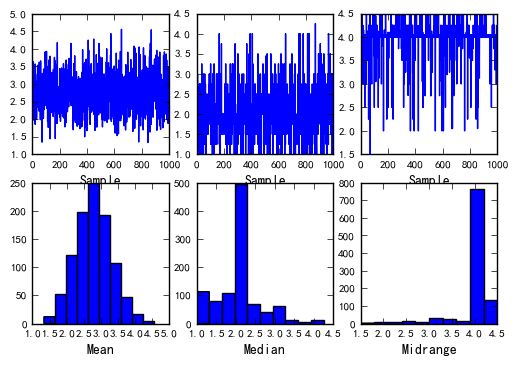

In [78]:
from pandas.tools.plotting import bootstrap_plot
a=file[u'正常工时']
if __name__ == '__main__':
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.figure()
    bootstrap_plot(a, size=20, samples=1000, color='blue')
plt.show()

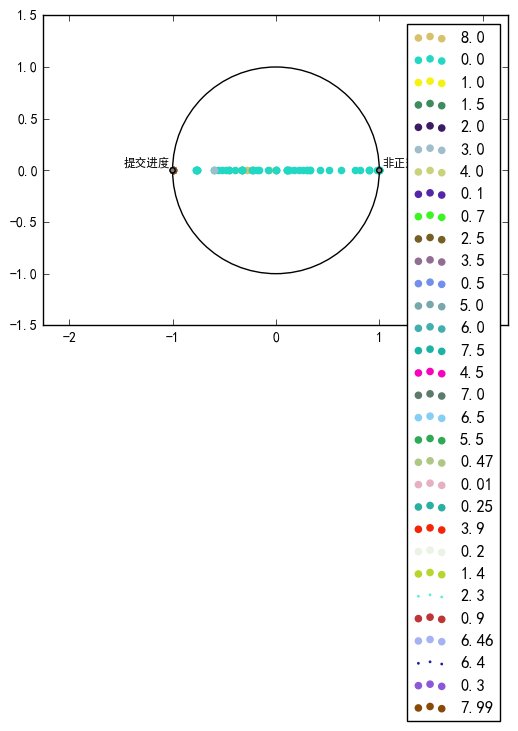

In [87]:
from pandas.tools.plotting import radviz
data=file[[u'正常工时',u'非正班工时',u'提交进度']].copy()
if __name__ == '__main__':
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    plt.figure()
    radviz(data, u'正常工时')
plt.show()

In [21]:
a=t[t[u'正常工时']>0]
print (a.median()) #取中位数

print (a.mode()) #取众数

正常工时    2.0
dtype: float64
   正常工时
0   1.0


数据质量检查主要运用箱线图来观测异常值

异常值被定义为一组测定值中与平均值的偏差超过3倍标准差的值

运用isnull来查看缺失值

利用unique去除数据中重复的元素

notnull判断是否非空数值

random生成随机矩阵

缺失值处填充利用fillna

利用dropna获取非空的数据

插值法ts.interpolate().count()计算所有数据的数量（包含空值）

interpolate(method='',order=2,limit=)

利用插值法需要对插入的值和插值的方法进行验证其正确性。

In [34]:
b=file[u'正常工时']
b.head()

0    8.0
1    0.0
2    NaN
3    1.0
4    0.0
Name: 正常工时, dtype: float64

In [39]:
c=b.interpolate(method="spline",order=1)

In [48]:
a=file.rolling(window=3)

使用groupby.agg()功能提升数据各种分析值的汇总能力

In [4]:
a=file.groupby([u'研发管控项目']).agg(np.sum)

存在muti-index时，将需要分析的列取出，利用copy()功能

In [5]:
b=a.sort_values(by=(u'正常工时'),ascending=False)
print(b.columns)
data=b[u'正常工时'].copy()
data

Index(['提交进度', '正常工时', '非正班工时', '核实正班', '核实非正班', '不通过原因', '评价', '日志填写时长(秒)'], dtype='object')


研发管控项目
PLC-数据发放及EPIC管理    963.11
创新管理               327.50
精益开发管理             254.00
研发信息化系统管理          251.50
PLM实施              229.50
对标                 189.00
VAVE                78.50
需求管理                69.17
Name: 正常工时, dtype: float64

plot()参数详解



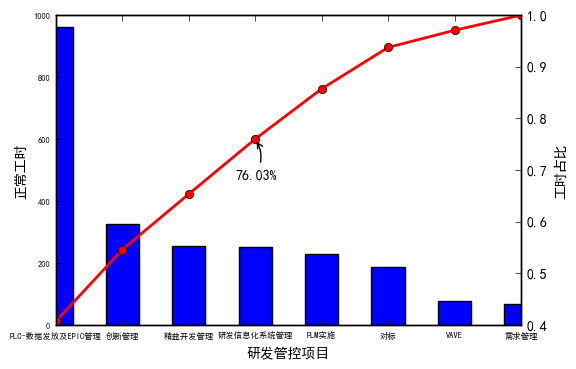

In [47]:
from pandas.tools.plotting import table

if __name__ == '__main__':
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    fig,ax= plt.subplots(1,1)

#     ax.axis["bottom"].major_ticklabels.set_axis_direction("left")

#     fig, ax = plt.subplots(1, 1) 
#     ax.get_xaxis().set_visible(False)
#     table(ax, np.round(data.describe(), 2),
#         loc='upper right', colWidths=[0.2, 0.2])
    

#     data.plot(kind='bar',ax=ax,ylim=(0,2),legend=None)
   
    plt.ylabel(u'正常工时')
    p=1.0*data.cumsum()/data.sum()
    data.plot.bar(ax=ax,fontsize=6)
#     print (p[4])
    p.plot(color='r',secondary_y=True, style='-o',linewidth=2,ax=ax,fontsize=6)
   
    plt.annotate(format(p[3],'.2%'), xy=(3,p[3]), xytext=(3*0.9,p[3]*0.9),
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.3"))
    plt.ylabel(u'工时占比')
    plt.show()
# b.T

In [44]:
if __name__ == '__main__':
    p=e.boxplot()
    x=p['fliers'][0].get_xdata()
    y=p['fliers'][0].get_ydata()
    y.sort()

NameError: name 'e' is not defined

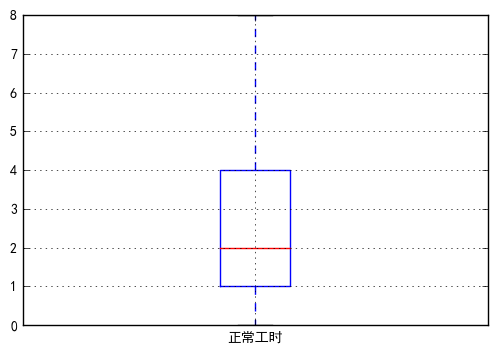

,正常工时
count,1484.000000
mean,2.783699
std,2.381017
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,8.000000


In [61]:
for i in range(len(x)):
    if i>0:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.05-0.8/(y[i]-y[i-1]),y[i]))
    else:
        plt.annotate(y[i],xy=(x[i],y[i]),xytext=(x[i]+0.08,y[i]))
plt.show()
e.describe()

Pandas其他常用的统计方法有： 

######################## ****************************************** 

count 非 NA 值的数量 

describe 针对 Series 或 DF 的列计算汇总统计

min , max 最小值和最大值 

argmin , argmax 最小值和最大值的索引位置（整数）

idxmin , idxmax 最小值和最大值的索引值 

quantile 样本分位数（0 到 1） 

sum 求和 

mean 均值 

median 中位数 

mad 根据均值计算平均绝对离差 

var 方差 

std 标准差 

skew 样本值的偏度（三阶矩） 

kurt 样本值的峰度（四阶矩） 

cumsum 样本值的累计和

cummin , cummax 样本值的累计最大值和累计最小值 

cumprod 样本值的累计积 

diff 计算一阶差分（对时间序列很有用） 

pct_change 计算百分数变化 


使用PCA功能进行主成分分析，去除掉数据中相关性较弱的数据列

In [90]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(a.copy())
new_data=pca.transform(a.copy())
L=pd.DataFrame(new_data)
print(pca.components_)
L.sum()
print(pca.explained_variance_ratio_)

[[ 0.99029137  0.13900721]
 [-0.13900721  0.99029137]]
[ 0.85903852  0.14096148]


In [1]:
from statsmodels.tsa.arima_model import ARMA

In [3]:
from statsmodels.tsa.arima_model import AR

In [4]:
?AR()